##                                       ETL Project
###                          Title: Restaurant Data with Consumer Ratings

### SQL(Structured Query Language)

SQL is a standard language, used for storing, manipulating, and retrieving data stored in a relational database.

All the RDBMS like MySQL, MS Access, Oracle, Postgres…use SQL as their standard language. It has many advantages over other languages as it allows to access data in RDBMS, it allows users to define, describe, create, drop, and manipulate the data and set permissions on tables, procedures and views.

SQL has standard commands to interact with the relational databases, these commands are differentiated into groups based on their nature:

1.DDL- Data Definition Language: which includes commands like CREATE, ALTER, DROP

2.DML-Data Manipulation Language: which includes commands like SELECT, INSERT, DELETE, UPDATE.

3.DCL-Data Control Language: which includes commands like GRANT, REVOKE

### DDL(Data Definition Language)

DDL is a subset of SQL used to create and modify the structure of objects (like Tables, views, schemas) in database.

DDL is also known as data description language as it describes the fields and records in the table.

## Steps to load the data using psycopg2

In [64]:
## Topic that we have selected for the project(Restaurant Data with Consumer Ratings) has total eight tables in CSV format and 
## we need to import the data using psycopg2 module for python praogramming.

In [91]:
# Import the psycopg2 package

import psycopg2
from password import password

# Establish a connection to PostgreSQL database using psycopg2.connect() method.

conn = psycopg2.connect(host="localhost", dbname="restaurants", user="postgres", password=password)
# conn.autocommit = True
# By using the connection object, create a new cursor to execute SQL statements
cur = conn.cursor()

#TABLE-1.Accepts (cash/VISA/Credit_card) in restaurant:

# Dropping accepts table if already exists: This step  drops, creates, inserts, selectes the table every time we run it,
# When building our database, this is handy as we are constantly creating and manipulating the schema.

cur.execute("DROP TABLE IF EXISTS accepts")
print("Table 1 dropped... ")

# create table-1 accepts(cash/VISA/Credit_card) in restaurant:
## By executing the "CREATE TABLE" SQL command builds a new table called accepts with two columns using cursor.execute()method.

sql = '''CREATE TABLE accepts(placeID int, 
         Rpayment text);'''
## The mandatory semi-colon at the end of the statement is used to process every command before it.

cur.execute(sql)

##  After creating the table we need to execute the "copy" command in the SQL by specify the path of the CSV file

sql2 = '''COPY accepts(placeID, Rpayment)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\chefmozaccepts.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

# Select all the columns from table-accepts
sql3 = '''SELECT * from accepts;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-2. Type of cuisine in the restaurant:

cur.execute("DROP TABLE IF EXISTS cuisine ")  #Drop cuisine table if already exists
print("Table 2 dropped... ")

## This CREATE command builds a new table cuisine that has two columns namely placeID which is a primary key and Rcuisine.

sql = '''CREATE table cuisine(placeID int, 
         Rcuisine text);'''

cur.execute(sql)

sql2 = '''COPY cuisine(placeID, Rcuisine)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\chefmozcuisine.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

sql3 = '''SELECT * from cuisine;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-3. Restaurant timings

cur.execute("DROP TABLE IF EXISTS hours ")  #Drop hours table if already exists
print("Table 3 dropped... ")

## This CREATE command builds a new table called hours that has three columns in it, namely placeID the data type is integer,
# hours and days both are of data type varchar.
sql = '''CREATE table hours(placeID int, 
         hours varchar,
         days varchar);'''

cur.execute(sql)

sql2 = '''COPY hours(placeID, hours, days)
FROM 'A:/launch_code_STL/Final_Homework/week-15/Restaurant/chefmozhours4.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

sql3 = '''SELECT * from hours;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-4. Restaurant Parking

cur.execute("DROP TABLE IF EXISTS parking ")  #Drop parking table if already exists
print("Table 4 dropped... ")

## This CREATE command builds a new table called parking that has two columns in it, namely placeID the data type is integer,
# and parkinglot of data type text.
sql = '''CREATE table parking(placeID int, 
         lot text);'''

cur.execute(sql)

sql2 = '''COPY parking(placeID, lot)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\chefmozparking.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

sql3 = '''SELECT * from parking;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-5. Restaurant Geoplaces in mexican country

cur.execute("DROP TABLE IF EXISTS geoplaces ")  #Drop geoplaces table if already exists
print("Table 5 dropped... ")

## This CREATE command builds a new table called geoplaces that has 21 columns in it,the data types can be integer,
# the string CHAR other data types can be text, boolean, datetime.

sql = '''CREATE table geoplaces(placeID integer,
                                latitude float,
                                longitude float,
                                the_geom_meter varchar,
                                name varchar,
                                address varchar,
                                city varchar,
                                state varchar,
                                country varchar,
                                fax varchar,
                                zip varchar,
                                alcohol varchar,
                                smoking_area text,
                                dress_code text,
                                accessibility text,
                                price text,
                                url varchar,
                                Rambience text,
                                franchise text,
                                area text,
                                other_services text);'''

cur.execute(sql)

sql2 = '''COPY geoplaces(placeID, latitude, longitude, the_geom_meter, name, address, city, state, country, fax, zip, alcohol,
                        smoking_area, dress_code, accessibility, price, url, Rambience, franchise, area, other_services)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\geoplaces2.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

## ALTER AND DROP THE COLUMNS THAT HAS NO VALUES AND WHICH ARE OF NO USE

# Dropping the fax column which has no values using alter statement
cur.execute("alter table geoplaces drop column fax ")
print("fax coulmn droped")

# Dropping both latitude, and longitude columns 
cur.execute("alter table geoplaces drop column latitude, drop column longitude")
print("latitude, longitude columns dropped")

sql3 = '''SELECT * from geoplaces;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-6. Ratings table

cur.execute("DROP TABLE IF EXISTS rating ")  #Drop rating table if already exists
print("Table 6 dropped... ")

## This CREATE command builds a new table called rating that has 5 columns in it,the data types are integers and char
sql = '''CREATE table rating(userID varchar,
                             placeID integer,
                             rating integer,
                             food_rating integer,
                             service_rating integer);'''

cur.execute(sql)

sql2 = '''COPY rating(userID, placeID, rating, food_rating, service_rating)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\\rating.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

# Select all the fields and records from the rating table 

sql3 = '''SELECT * from rating;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-7. User cuisine information table:

cur.execute("DROP TABLE IF EXISTS usercuisine ")  #Drop usercuisine table if already exists
print("Table 7 dropped... ")

## This CREATE command builds a new table called usercuisine that has two columns namely userID which is a primary key and 
## Ucuisine with text as data type
sql = '''CREATE table usercuisine(userID varchar,
                                  Ucuisine  text);'''

cur.execute(sql)

sql2 = '''COPY usercuisine(userID, Ucuisine)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\\usercuisine.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

sql3 = '''SELECT * from usercuisine;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# TABLE-8. user payment information table

cur.execute("DROP TABLE IF EXISTS userpayment ")  #Drop userpayment table if already exists
print("Table 8 dropped... ")

## This CREATE command builds a new table called userpayment that has two columns namely userID with varchar as data type and 
## Upayment with text as data type
sql = '''CREATE table userpayment(userID varchar,
                                  Upayment text);'''

cur.execute(sql)

sql2 = '''COPY userpayment(userID, Upayment)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\\userpayment.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

sql3 = '''SELECT * from userpayment;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()
# TABLE-9. user profile information table

cur.execute("DROP TABLE IF EXISTS userprofile ")  #Drop userpayment table if already exists
print("Table 9 dropped... ")

sql = '''CREATE table userprofile(userID varchar, 
                                  latitude float, 
                                  longitude float,
                                  smoker varchar, 
                                  drink_level text, 
                                  dress_preference varchar, 
                                  ambience varchar, 
                                  transport varchar,
                                  marital_status varchar,
                                  hijos varchar, 
                                  birth_year integer,
                                  interest varchar, 
                                  personality varchar, 
                                  religion text, 
                                  activity varchar, 
                                  color text, 
                                  weight integer, 
                                  budget varchar, 
                                  height float);'''

cur.execute(sql)

sql2 = '''COPY userprofile(userID, latitude, longitude, smoker, drink_level, dress_preference, ambience, transport, 
            marital_status, hijos, birth_year, interest, personality, religion, activity, color, weight, budget, height)
FROM 'A:\launch_code_STL\Final_Homework\week-15\Restaurant\\userprofile.csv'
DELIMITER ','
CSV HEADER;'''

cur.execute(sql2)

sql3 = '''SELECT * from userprofile;'''

cur.execute(sql3)

for i in cur.fetchmany(3):
    print(i)
    
conn.commit()

# conn.close()


Table 1 dropped... 
(135110, 'cash')
(135110, 'VISA')
(135110, 'MasterCard-Eurocard')
Table 2 dropped... 
(135110, 'Spanish')
(135109, 'Italian')
(135107, 'Latin_American')
Table 3 dropped... 
(135111, '00:00-23:30;', 'Mon;Tue;Wed;Thu;Fri;')
(135111, '00:00-23:30;', 'Sat;')
(135111, '00:00-23:30;', 'Sun;')
Table 4 dropped... 
(135111, 'public')
(135110, 'none')
(135109, 'none')
Table 5 dropped... 
fax coulmn droped
latitude, longitude columns dropped
(134999, '0101000020957F000088568DE356715AC138C0A525FC464A41', 'Kiku Cuernavaca', 'Revolucion', 'Cuernavaca', 'Morelos', 'Mexico', '?', 'No_Alcohol_Served', 'none', 'informal', 'no_accessibility', 'medium', 'kikucuernavaca.com.mx', 'familiar', 'f', 'closed', 'none')
(132825, '0101000020957F00001AD016568C4858C1243261274BA54B41', 'puesto de tacos', 'esquina santos degollado y leon guzman', 's.l.p.', 's.l.p.', 'mexico', '78280', 'No_Alcohol_Served', 'none', 'informal', 'completely', 'low', '?', 'familiar', 'f', 'open', 'none')
(135106, '01010

# SQL queries

#### 1. Identify the top two Restaurant names that serve largest no.of cuisines and has top overall rating?

In [82]:
# Import the psycopg2 package
import psycopg2
from password import password
## Establish a connection to PostgreSQL database using psycopg2.connect() method.
conn = psycopg2.connect(host="localhost", dbname="restaurants", user="postgres", password=password)
# By using the connection object, create a new cursor to execute SQL statements
cur = conn.cursor()
# First SQL_query to identify the top two restaurants that serve largest no.of cuisines and has highest overall rating
# STEP-1 Tables to join geoplaces>rating>cuisine 
# STEP-2 Key to join geoplaces and rating is placeid and to join rating and cuisine we use placeid.
# STEP-3 To get the list of restaurants with more no. of cuisines COUNT DISTINCT cuisines in DESCENDING order.
# STEP-4 The aggregate function AVG gives the list of restaurants with highest overall rating and to get the list from top 
#        use DESC in ORDER BY CLAUSE.
SQL_query1 = '''SELECT g.placeid, g.name, AVG(r.rating) as avg_rating, COUNT(DISTINCT rcuisine) AS cuisine_cnt
                FROM geoplaces AS g
                    INNER JOIN rating AS r
                        ON g.placeid = r.placeid
                    INNER JOIN cuisine AS c
                        ON r.placeid = c.placeid
                    GROUP BY g.placeid, g.name
                    ORDER BY  cuisine_cnt DESC, avg_rating DESC;'''

cur.execute(SQL_query1)
for i in cur.fetchmany(5):  # shows only first five restaurants
    print(f"placeid :{i[0]}, name :{i[1]}, avg_rating :{i[2]}, cuisine_cnt :{i[3]}")

placeid :134976, name :Log Yin, avg_rating :1.7500000000000000, cuisine_cnt :3
placeid :135053, name :La Fontana Pizza Restaurante and Cafe, avg_rating :1.1250000000000000, cuisine_cnt :3
placeid :135030, name :Preambulo Wifi Zone Cafe, avg_rating :1.5833333333333333, cuisine_cnt :2
placeid :132773, name :El cotorreo, avg_rating :1.5000000000000000, cuisine_cnt :2
placeid :135073, name :Restaurante Bar El Gallinero, avg_rating :1.5000000000000000, cuisine_cnt :2


From the above list we find the top two restaurants with highest average rating,

1. "Log Yin" with 1.75 rating and serves 3 cuisines

2. "La Fontana Pizza Restaurante and Cafe" with 1.12 rating and serves 3 cuisines.

#### 2. Determine the top two cities that are having more number of restaurants which are medium in price and also top overall rating?

In [83]:
cur = conn.cursor()

# 2. SQL_query to determine the top two cities with more number of restaurants which are medium in price and with highest 
# overall rating.
# STEP-1 Tables to join geoplaces>rating>parking 
# STEP-2 Key to join geoplaces and rating is placeid and to join rating and parking we use placeid.
# STEP-3 To get the list of cities with more number of restaurants COUNT DISTINCT placeid in DESCENDING order.
# STEP-4 Use the WHERE CLAUSE to filter the medium price restaurants.
# STEP-5 The aggregate function AVG gives the list of restaurants with highest overall rating and use DESC in ORDER BY 
#        CLAUSE to get the list from highest to lowest.

SQL_query2 = '''SELECT city, COUNT(DISTINCT g.placeid) AS restuarant_cnt, AVG(r.rating) as avg_rating
                FROM geoplaces AS g
                INNER JOIN rating AS r
                    ON g.placeid = r.placeid
                INNER JOIN parking AS p
                    ON r.placeid = p.placeid
                WHERE city != '?' AND price = 'medium'
                GROUP BY city
                ORDER BY restuarant_cnt DESC, avg_rating DESC;'''

cur.execute(SQL_query2)
for i in cur.fetchmany(2):  # shows only top two cities
    print(f"city :{i[0]}, restuarant_cnt :{i[1]}, avg_rating :{i[2]}")

city :San Luis Potosi, restuarant_cnt :34, avg_rating :1.2685851318944844
city :Cuernavaca, restuarant_cnt :8, avg_rating :1.3333333333333333


In Mexico country, the two cities which are having more number of restaurants with highest overall rating and medium price are 
"San Luis Potosi" and "Cuernavaca"

#### 3. List of restaurants that has American cuisine with overall rating and accepts cash for payment?

In [84]:
cur = conn.cursor()

# 3. SQL_query, In Mexico Country, list of restaurants that has American cuisine with overall rating and accepts cash for 
# payments 
# STEP-1 Tables to join geoplaces>rating>accepts 
# STEP-2 Key to join geoplaces and rating is placeid and to join rating and accepts we use placeid.
# STEP-3 Use the WHERE CLAUSE to filter the list of restaurants that has American cuisine
# STEP-4 Again, use the WHERE CLAUSE to filter the payments that accepts cash
# STEP-5 The aggregate function AVG gives the list of restaurants with highest overall rating and use DESC in ORDER BY 
#        CLAUSE to get the list from highest to lowest.


SQL_query3 = '''SELECT g.placeid, g.name AS Restaurant_name, AVG(r.rating) as avg_rating, rpayment
                FROM cuisine AS c
                    INNER JOIN geoplaces AS g
                        ON c.placeid = g.placeid
                    INNER JOIN rating AS r
                        ON g.placeid = r.placeid
                    INNER JOIN accepts as a 
                        ON r.placeid = a.placeid
                    WHERE rcuisine = 'American' AND rpayment = 'cash'
                    GROUP BY g.placeid, Restaurant_name, rpayment
                    ORDER BY avg_rating DESC;'''

cur.execute(SQL_query3)
for i in cur.fetchall(): # shows the entire list of Restaurants
    print(f"placeid :{i[0]}, Restaurant_name :{i[1]}, avg_rating :{i[2]}, rpayment :{i[3]}")

placeid :132958, Restaurant_name :tacos los volcanes, avg_rating :1.6666666666666667, rpayment :cash
placeid :132851, Restaurant_name :KFC, avg_rating :1.4285714285714286, rpayment :cash
placeid :132583, Restaurant_name :McDonalds Centro, avg_rating :1.00000000000000000000, rpayment :cash
placeid :132951, Restaurant_name :VIPS, avg_rating :1.00000000000000000000, rpayment :cash
placeid :132872, Restaurant_name :Pizzeria Julios, avg_rating :0.91666666666666666667, rpayment :cash


In Total we have five restaurants with highest overall rating in mexico, where american cuisine is served. They are:
    
1. "tacos los volcanes" with 1.6 avg rating
2. "KFC" with 1.4 avg rating
3. "McDonalds Centro" and "VIPS" with 1 as avg rating
4. "Pizzeria Julios" with 0.91 avg rating.


#### 4. Determine the list of all restaurants that serve alcohol and are open all day long(24 Hours) on saturdays and sundays and has Bar/Bar_Pub_Brewery?

In [85]:
cur = conn.cursor()

# 4. SQL_query, In Mexico Country, list of all restaurants that serve alcohol and are open 24 Hours on saturdays and sundays
#               and has Bar/Bar_Pub_Brewery.
# STEP-1 Tables to join geoplaces>hours>cuisine 
# STEP-2 Key to join geoplaces and hours is placeid and to join hours and cuisine we use placeid.
# STEP-3 Use the WHERE CLAUSE to filter the list of restaurants that are open all day long
# STEP-4 Again, use the WHERE CLAUSE to filter for Bar/Bar_Pub_Brewery in cuisine also filter saturdays and sundays.
# STEP-5 SELECT the columns that has relavant information with the question like hours restaurant names and type of cuisine.

SQL_query4 = '''SELECT g.placeid,h.hours, g.name AS Restaurant_name, rcuisine AS cuisine
                FROM geoplaces AS g
                    INNER JOIN hours AS h
                        ON g.placeid = h.placeid
                    INNER JOIN cuisine AS c
                        ON h.placeid = c.placeid
                    WHERE hours = '00:00-00:00;' AND (rcuisine = 'Bar' OR rcuisine ='Bar_Pub_Brewery') AND days != 'Mon;Tue;Wed;Thu;Fri;'
                    GROUP BY g.placeid, Restaurant_name, cuisine, hours
                    ORDER BY Restaurant_name DESC;'''

cur.execute(SQL_query4)
for i in cur.fetchall():  # Shows the List of all restaurants
    print(f"placeid :{i[0]}, hours :{i[1]}, Restaurant_name :{i[2]}, cuisine :{i[3]}")

placeid :135073, hours :00:00-00:00;, Restaurant_name :Restaurante Bar El Gallinero, cuisine :Bar
placeid :135073, hours :00:00-00:00;, Restaurant_name :Restaurante Bar El Gallinero, cuisine :Bar_Pub_Brewery
placeid :135019, hours :00:00-00:00;, Restaurant_name :Restaurant Bar Coty y Pablo, cuisine :Bar
placeid :135041, hours :00:00-00:00;, Restaurant_name :Luna Cafe, cuisine :Bar
placeid :135026, hours :00:00-00:00;, Restaurant_name :la Cantina, cuisine :Bar
placeid :135026, hours :00:00-00:00;, Restaurant_name :la Cantina, cuisine :Bar_Pub_Brewery


There are six restaurants with open hours on saturdays and sundays and has Bar/Bar_Pub_Brewery.

#### 5. To determine the list of restaurants that are open 24 hours during weekdays and their average sevice rating?

In [86]:
cur = conn.cursor()

# 5. SQL_query, list of all restaurants that are open 24 hours during weekdays and their average sevice rating.
# STEP-1 Tables to join geoplaces>hours>rating 
# STEP-2 Key to join geoplaces and hours is placeid and to join hours and rating we use placeid.
# STEP-3 Use the WHERE CLAUSE to filter the list of restaurants that are open 24 hours during weekdays(Mon;Tue;Wed;Thu;Fri)
# STEP-4 SELECT the columns that has relavant information with the question like hours restaurant names.


SQL_query4 = '''SELECT g.placeid, g.name AS Restaurant_name, h.hours, AVG(service_rating) AS Overall_service_rating
                FROM geoplaces AS g
                    INNER JOIN hours AS h
                        ON g.placeid = h.placeid
                    INNER JOIN rating AS r
                        ON h.placeid = r.placeid
                    WHERE hours = '00:00-00:00;' AND days = 'Mon;Tue;Wed;Thu;Fri;'
                    GROUP BY g.placeid, Restaurant_name, h.hours
                    ORDER BY Overall_service_rating DESC;'''

cur.execute(SQL_query4)
for i in cur.fetchall():  # Shows the List of all restaurants
    print(f"placeid :{i[0]}, Restaurant_name :{i[1]}, hours :{i[2]}, service_rating :{i[3]}")

placeid :135018, Restaurant_name :El Oceano Dorado, hours :00:00-00:00;, service_rating :1.5000000000000000
placeid :135030, Restaurant_name :Preambulo Wifi Zone Cafe, hours :00:00-00:00;, service_rating :1.4166666666666667
placeid :135011, Restaurant_name :Los Vikingos, hours :00:00-00:00;, service_rating :1.3333333333333333
placeid :135085, Restaurant_name :Tortas Locas Hipocampo, hours :00:00-00:00;, service_rating :1.1666666666666667
placeid :135043, Restaurant_name :pizza clasica, hours :00:00-00:00;, service_rating :1.1111111111111111
placeid :135016, Restaurant_name :Arrachela Grill, hours :00:00-00:00;, service_rating :1.00000000000000000000
placeid :135041, Restaurant_name :Luna Cafe, hours :00:00-00:00;, service_rating :1.00000000000000000000
placeid :135019, Restaurant_name :Restaurant Bar Coty y Pablo, hours :00:00-00:00;, service_rating :0.83333333333333333333


In Total we have eight restaurants that are open 24 hours during weekdays with highest service rating. 

#### 6.Find users who drink and enjoy French cuisine 

In [92]:
cur = conn.cursor()

# 6. SQL_query, users who drink and enjoy French cuisine.

# STEP-1 Tables to join userprofile>usercuisine 
# STEP-2 Key to join userprofile and usercuisine is userid.
# STEP-3 Use the WHERE CLAUSE to filter the list of users who prefer to have French cuisine 
# STEP-4 Use ORDER BY CLAUSE with userid.


SQL_query6 = '''SELECT u.userid, c.ucuisine AS User_Cuisine, u.drink_level
                   FROM userprofile AS u
                       INNER JOIN usercuisine AS c
                           ON u.userid = c.userid
                       WHERE ucuisine = 'French' AND drink_level != 'abstemious'
                       ORDER BY u.userid;'''
cur.execute(SQL_query6)
for i in cur.fetchall():
    print(f"userid: {i[0]}, User_Cuisine: {i[1]}, drink_level: {i[2]}")
    

userid: U1135, User_Cuisine: French, drink_level: casual drinker


We have only one user with user_id U1135 who likes to have French cuisine and likes drinking. 

## Lucid chart: Restaurant Data with Consumer Ratings

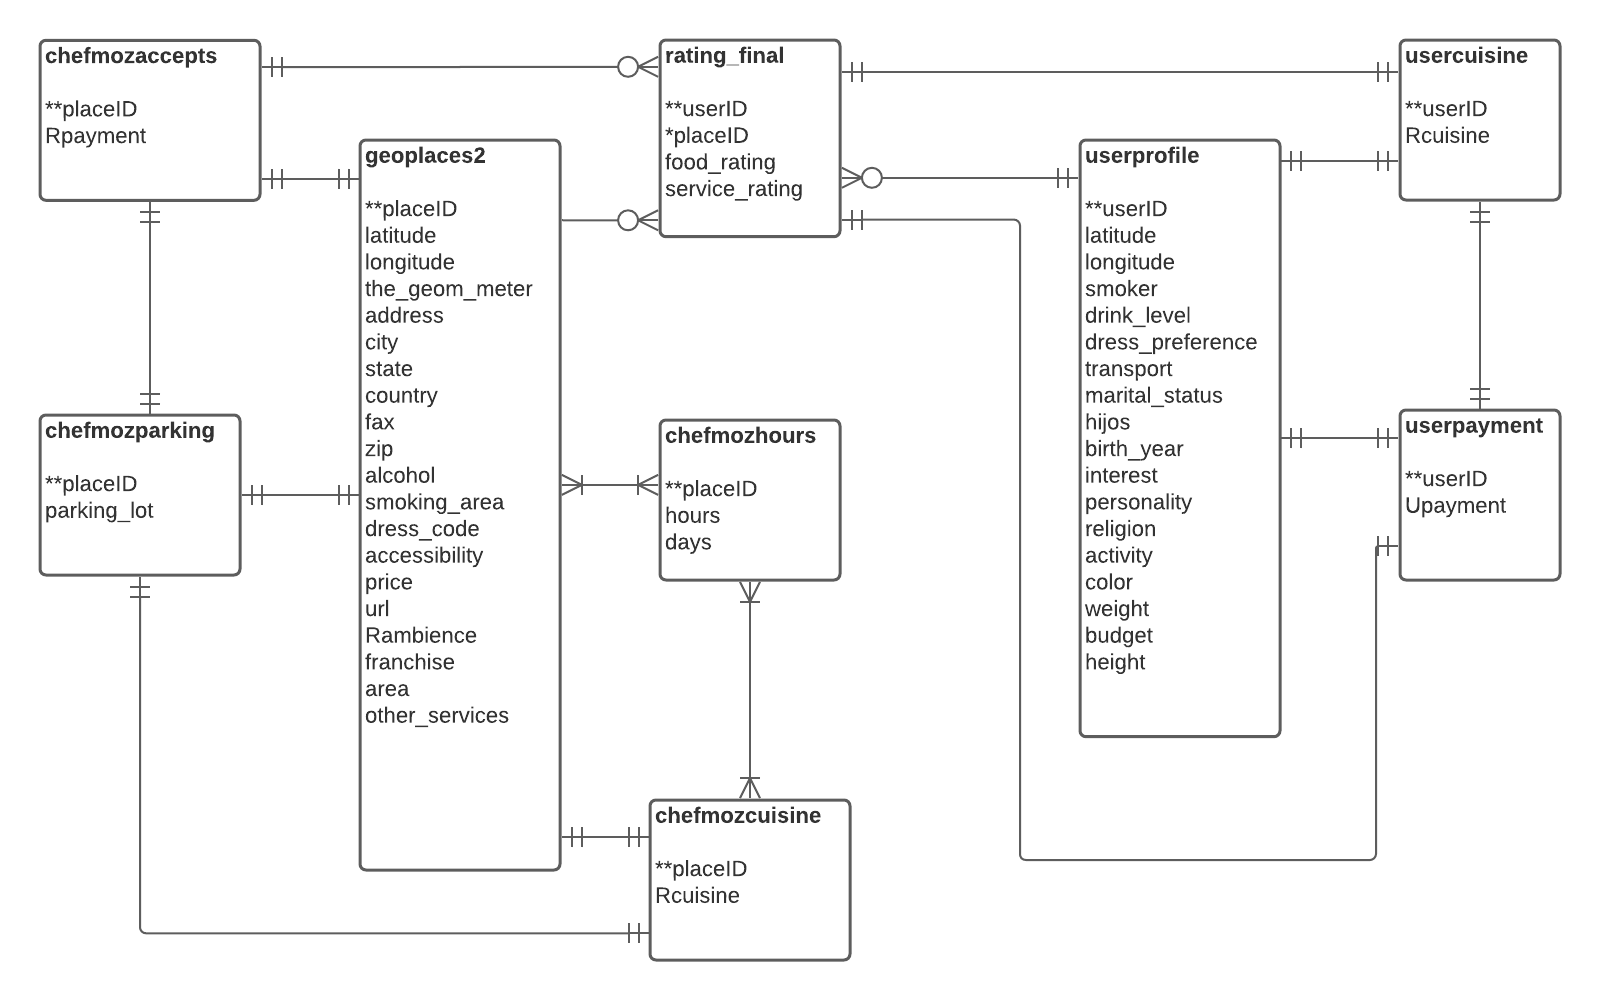

Data Resources : 

https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings/metadata
        
https://www.dataquest.io/blog/loading-data-into-postgres/
        
https://www.geeksforgeeks.org/python-import-csv-into-postgresql/
